In [2]:
import numpy as np
import h5py
from tools import *
from matplotlib import pyplot as plt 
import pandas as pd
import random as rand
from scipy.stats import zscore

In [3]:
h5_datas = h5py.File("../ml_project_data/h5/X_train.h5/X_train.h5","r")
y_train = pd.read_csv('../ml_project_data/h5/y_train.csv').values

In [4]:
generator_eeg = (np.array([h5_datas[key][record] for key in h5_datas.keys() if "eeg" in key]) for record in range(len(h5_datas["eeg_1"])))

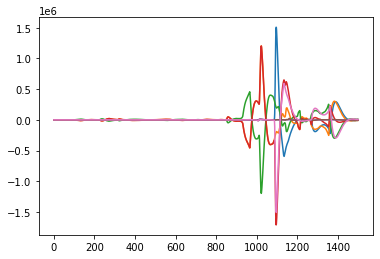

In [5]:
next(generator_eeg)
plt.plot(next(generator_eeg).T);

In [6]:
def record(index):
    return np.array([h5_datas[key][sorted(index)] for key in h5_datas.keys() if "eeg" in key])


In [7]:
len_sample = 100
samples_0 =rand.sample([record[0] for record in y_train if record[1] == 0],len_sample)
samples_1 =rand.sample([record[0] for record in y_train if record[1] == 1],len_sample)
samples_2 =rand.sample([record[0] for record in y_train if record[1] == 2],len_sample)
samples_3 =rand.sample([record[0] for record in y_train if record[1] == 3],len_sample)
samples_4 =rand.sample([record[0] for record in y_train if record[1] == 4],len_sample)
all_samples_index = np.array([samples_0,samples_1,samples_2,samples_3,samples_4]).ravel()


In [8]:
all_samples = np.transpose(record(all_samples_index),(1, 0, 2))

In [9]:
all_samples.shape

(500, 7, 1500)

In [11]:
treated_samples = []
for sample in all_samples:
    treated_samples.append([treat_record_wpt(eeg) for eeg in sample])

In [13]:
np.array(treated_samples).shape

(500, 7, 8)

In [85]:
treated_samples = np.reshape(np.array(treated_samples),(len(all_samples_index),56))

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# Normalize the dataset
treated_samples = scale(treated_samples)
pca = PCA(n_components=7)
pca.fit(treated_samples);

In [13]:
treated_samples

array([[-0.07289108, -0.10772873, -0.04879211, ..., -0.11879542,
        -0.07978072, -0.07142502],
       [-0.07286804, -0.10768411, -0.04878998, ..., -0.11879823,
        -0.0797557 , -0.07141695],
       [-0.07289067, -0.1076463 , -0.04878485, ..., -0.1186318 ,
        -0.07969599, -0.07138715],
       ...,
       [-0.07282862, -0.09578833, -0.0424029 , ..., -0.11924245,
        -0.07987335, -0.07146916],
       [-0.0728916 , -0.10774935, -0.04879992, ..., -0.11925393,
        -0.07987397, -0.07146954],
       [-0.07216904, -0.07325676, -0.04703633, ..., -0.11852973,
        -0.07985743, -0.07137434]])

In [14]:
pca.explained_variance_ratio_

array([0.33969002, 0.23946185, 0.1457351 , 0.09164379, 0.05945805,
       0.04074109, 0.02955746])

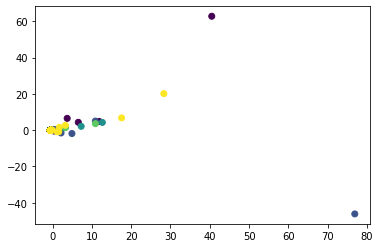

In [15]:
plt.scatter(pca.transform(treated_samples)[:,0],pca.transform(treated_samples)[:,1],c=y_train[all_samples_index][:,1])

In [16]:
import skfuzzy as fuzz
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        pca.transform(treated_samples).T, 5, 2, error=0.005, maxiter=1000, init=None)

In [17]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    pca.transform(treated_samples).T, cntr, 5, error=0.005, maxiter=1000)


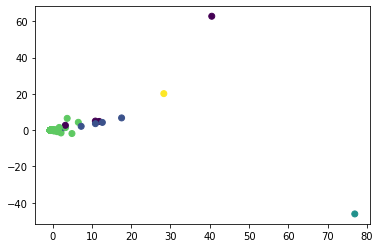

In [18]:
plt.scatter(pca.transform(treated_samples)[:,0],pca.transform(treated_samples)[:,1],c=np.argmax(u,axis=0))

In [19]:
np.argmax(u,axis=0)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [20]:
y_train[all_samples_index][:,1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,